In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd1 = pd.read_csv('crime_data.csv')
cd1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
cd1.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
# Standarization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cd1_df = scaler.fit_transform(cd1.iloc[:,1:])

In [5]:
scaled_cd1_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_cd1_df)

KMeans(n_clusters=4, random_state=0)

In [8]:
cd1['cluster'] = kmeans.predict(scaled_cd1_df)
cd1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [9]:
# within a cluster sum of aquare
kmeans.inertia_

57.55425863091104

In [10]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_cd1_df)
    dist = kmeans.inertia_
    wcss.append(dist)

In [11]:
wcss

[104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.92746404497574,
 40.52183461131976,
 34.6873883978491,
 32.70648136388185,
 28.311639397122555]

In [12]:
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

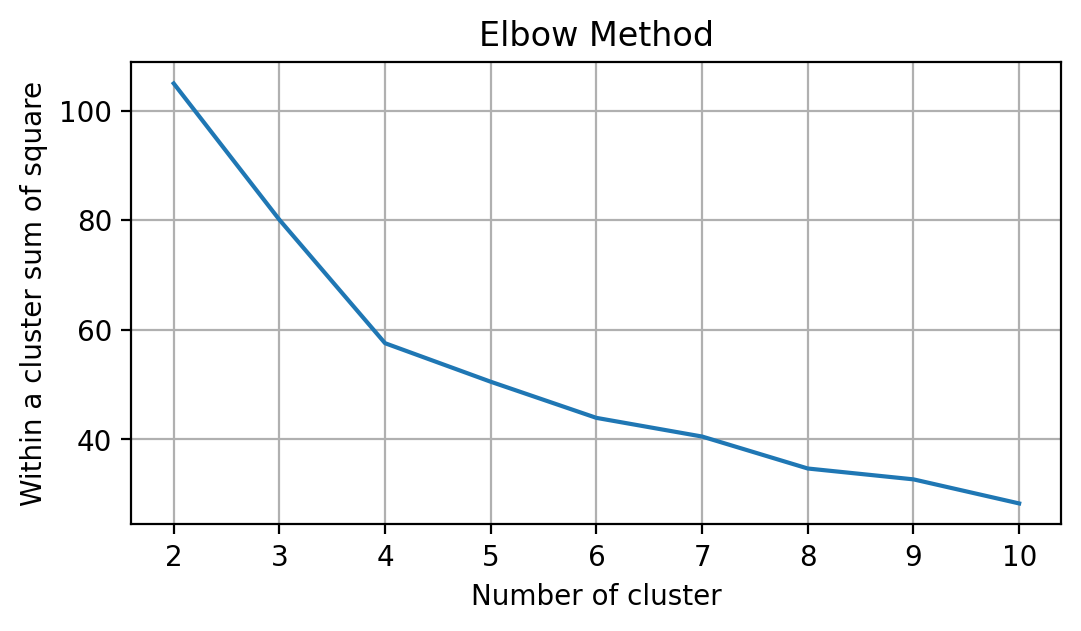

In [13]:
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Within a cluster sum of square')
plt.grid()

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_cd1_df)
    wcss.append(kmeans.inertia_)
    if i > 2:
        break

In [15]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_cd1_df)

KMeans(n_clusters=3, random_state=0)

In [16]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [17]:
#Assign clusters to the data set
cd1['clusterid_new'] = clusters_new.labels_
cd1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,3,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,1


In [18]:
clusters_new.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [19]:
cd1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,3,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,1


In [20]:
#What is avarage of top10 for cluster 1 = 86.6
cd1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,cluster
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,2.000000
1,1,12.331579,259.315789,68.315789,29.215789,1.736842
2,2,6.016667,143.888889,72.333333,19.344444,0.222222


In [21]:
cd1[cd1['clusterid_new']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,1
12,Illinois,10.4,249,83,24.0,1,1
17,Louisiana,15.4,249,66,22.2,3,1
19,Maryland,11.3,300,67,27.8,1,1


In [22]:
cd1[cd1['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new
11,Idaho,2.6,120,54,14.2,2,0
14,Iowa,2.2,56,57,11.3,2,0
16,Kentucky,9.7,109,52,16.3,2,0
18,Maine,2.1,83,51,7.8,2,0
22,Minnesota,2.7,72,66,14.9,2,0
25,Montana,6.0,109,53,16.4,2,0
26,Nebraska,4.3,102,62,16.5,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
33,North Dakota,0.8,45,44,7.3,2,0
40,South Dakota,3.8,86,45,12.8,2,0


In [23]:
cd1['clusterid_new'].value_counts()

1    19
2    18
0    13
Name: clusterid_new, dtype: int64